<a href="https://colab.research.google.com/github/ArminVarmaz/DE_DA/blob/main/Termin_2/Termin_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Termin

**Ziele des 2. Termins**


*   Wiederholung und Übungen aus dem 1. Termin
*   Einführung in Daten und Datenmanagement
*   Erste Nutzung von Pandas und NymPy




* [Datenimport](#scrollTo=T9Z_dBseV5Ux&line=5&uniqifier=1)
* [Sortierung und Auswahl](#scrollTo=ksfdhOMod2wS&line=1&uniqifier=1)
* [Visualisierung](#scrollTo=6SKBpdM7ma9X&line=3&uniqifier=1)
* [Aufgabe zum Selbstmachen](#scrollTo=95O3XY9PqJ6a&line=1&uniqifier=1)

## Datenimport

Daten können in unterschiedlichen Skalierung, Frequenz, Dateiformaten etc. vorliegen. Der Regelfall in betrieblicher Praxis sind Daten in einer Datenbank enhalten, die entweder in eine Tabellenkalkulation (typischerweise Excel) exportiert oder gar in der Tabellenkalkulation gemanmaget werden. Der typische Datenimport in betrieblicher Praxis sieht einen Datenimport aus Excel vor. Daher werden wir damit i.d.R. arbeiten.

Nachfolgend schauen wir uns einen alternativen Weg an, um die Möglichkeiten von Python zu sehen.  und wollen die Daten aus einer empirischen Studie importieren. Die Daten für diese Fallstudie stammen von der Studie [Incentive effects in the demand for health care: a bivariate panel count data estimation](https://onlinelibrary.wiley.com/doi/10.1002/jae.680) von Regina Riphahn, Achim Wambach und Andreas Million in Journal of Applied Econometrics. Die Daten können wir uns direkt über den [Datenserver](http://qed.econ.queensu.ca/jae/datasets/riphahn001/) der Zeitschrift herunterladen. Die Daten sind aktuell im Github-Ordner und werden von dort hier eingelesen und verarbeitet.

In PyCharm funktioniert der Import aus einer lokalen Datei genauso einfach.

In [ ]:
import numpy as np
import pandas as pd

# Originaldaten laden
# url = 'https://raw.githubusercontent.com/ArminVarmaz/DE_DA/main/Termin_2/Data/rwm.data'
# npdata = np.loadtxt(url)
# dfData = pd.DataFrame(npdata)
# Dieser Abschnitt würde eine lokale Kopie erstellen. Wir könnten auch die Datei auf Github exportieren, aber dann müsste ich Login-Parameter hinterlegen
# df.to_excel('rwm1.xlsx', index=False)

# Wir starten hier mit der Excel-Datei, die bereits Spaltenüberschriften hat
url='https://github.com/ArminVarmaz/DE_DA/blob/main/Termin_2/Data/rwm.xlsx?raw=true'
dfData = pd.read_excel(url, sheet_name='Sheet1')

Zeige die Spaltenüberschriften an

In [ ]:
# entweder
print(dfData.columns)
# oder
lColNames = list(dfData.columns)
print(lColNames)



Index(['id', 'female', 'year', 'age', 'hsat', 'handdum', 'handper', 'hhninc',
       'hhkids', 'educ', 'married', 'haupts', 'reals', 'fachhs', 'abitur',
       'univ', 'working', 'bluec', 'whitec', 'self', 'beamt', 'docvis',
       'hospvis', 'public', 'addon'],
      dtype='object')
['id', 'female', 'year', 'age', 'hsat', 'handdum', 'handper', 'hhninc', 'hhkids', 'educ', 'married', 'haupts', 'reals', 'fachhs', 'abitur', 'univ', 'working', 'bluec', 'whitec', 'self', 'beamt', 'docvis', 'hospvis', 'public', 'addon']


# Datensortierung und Datenauswahl
Sortiere die Daten nach Kriterien

In [ ]:
# Sortierung: Zeige mir Daten sortiert nach Zufriedenheit
print("Sortierung nach Gesundheitszufriedenheit \n")
print(dfData.sort_values(["hsat"]))

# Doppelte Sortierung: Zeige mir Daten sortiert nach Zufriedenheit
print("Sortierung nach Gesundheitszufriedenheit und Geschlecht \n")
print(dfData.sort_values(["female", "hsat"]))



Sortierung nach Gesundheitszufriedenheit 

         id  female  year  age  hsat  handdum  handper  hhninc  hhkids  educ  \
2328    630       1  1985   55   0.0      1.0    100.0  3200.0       0  10.5   
24802  6361       0  1994   30   0.0      1.0    100.0  2900.0       0   7.0   
2750    741       1  1994   35   0.0      0.0      0.0  4000.0       1  11.5   
24602  6320       1  1987   40   0.0      0.0     50.0  1250.0       0  10.0   
14804  3814       0  1985   51   0.0      0.0      0.0  5568.0       1  10.5   
...     ...     ...   ...  ...   ...      ...      ...     ...     ...   ...   
24645  6327       0  1991   40  10.0      0.0      0.0  3800.0       1  11.5   
21757  5547       0  1986   31  10.0      0.0      0.0  2500.0       0  11.5   
15463  3970       0  1994   55  10.0      0.0      0.0  4700.0       0  10.5   
13518  3496       0  1994   56  10.0      0.0      0.0  2800.0       0  10.0   
3761    994       1  1986   57  10.0      0.0      0.0  3800.0       0   9.0 

Gebe nur die Daten mit gewünschten Eigenschaften aus. Hier nur Personen mit der Gesundheitszufriedenheit von 6

In [ ]:
# Bestimmte Werte nur anzeigen lassen
# Zunaechst logischen Index generieren
print("Alle Werte von Personen mit der Gesundheitszufriedenheit von 6 anzeigen lassen \n")
bIndex = dfData["hsat"] == 0
# Gewuenschte Daten anzeigen
print(dfData.loc[bIndex])


Alle Werte von Personen mit der Gesundheitszufriedenheit von 6 anzeigen lassen 

         id  female  year  age  hsat  handdum    handper  hhninc  hhkids  \
23        8       0  1984   64   0.0      1.0  70.000000  1500.0       0   
64       18       1  1985   58   0.0      1.0  30.000000  2313.0       0   
66       18       1  1991   64   0.0      1.0  70.000000  3100.0       0   
119      31       0  1991   44   0.0      0.0   0.000000  5000.0       0   
173      51       0  1987   32   0.0      1.0   7.649712  3650.0       1   
...     ...     ...   ...  ...   ...      ...        ...     ...     ...   
26924  6987       0  1991   55   0.0      0.0   0.000000  1500.0       1   
26999  7032       0  1991   52   0.0      1.0  20.000000  8000.0       1   
27025  7051       1  1994   28   0.0      0.0   0.000000  4800.0       0   
27122  7118       1  1991   52   0.0      0.0   0.000000  4500.0       0   
27193  7169       0  1994   33   0.0      0.0   0.000000  5000.0       0   

      

Gebe nur die Daten mit gewünschten Eigenschaften aus.



1.   Frauen mit der Gesundheitszufriedenheit von 6
2.   Frauen mit der Gesundheitszufriedenheit von 6 und Uni-Abschluss

Wenn wir die logische Oerationen auf Data Frames von pandas anwenden, gibt es besonderheiten zu beachten. Es ist wichtig,
1. bitwise Operatoren (`|` anstatt `or` und `&` anstatt `and`)
2. die Klammern um jeden Vergleichsoperator
zu nutzen!

Der Befehl `bIndex2 = (dfData["hsat"] == 6) & (dfData["female"] == 1)` funktioniert.

Dagegen funkioniert der Befehl `bIndex2 = dfData["hsat"] == 6 & dfData["female"] == 1` in der Regel nicht.



In [ ]:
 # Zwei Kriterien
print("Alle Werte von weiblichen Personen mit der Gesundheitszufriedenheit von 6 anzeigen lassen \n")
bIndex2 = (dfData["hsat"] == 6) & (dfData["female"] == 1)
# Gewuenschte Daten anzeigen
print(dfData.loc[bIndex2])
# Drei Kriterien
print("Alle Werte von weiblichen Personen mit der Gesundheitszufriedenheit von 6 und Uni-Abschluss anzeigen lassen \n")
bIndex3 = (dfData["hsat"] == 6) & (dfData["female"] == 1) & (dfData["univ"] == 1)
# Gewuenschte Daten anzeigen
print(dfData.loc[bIndex3])

Alle Werte von weiblichen Personen mit der Gesundheitszufriedenheit von 6 anzeigen lassen 

         id  female  year  age  hsat  handdum  handper    hhninc  hhkids  \
29       10       1  1988   30   6.0      0.0      0.0  3600.000       0   
30       10       1  1994   36   6.0      0.0      0.0  9200.000       1   
31       11       1  1988   37   6.0      0.0      0.0  1800.000       0   
36       12       1  1991   48   6.0      0.0      0.0  1740.000       0   
53       16       1  1985   37   6.0      0.0      0.0  2100.000       1   
...     ...     ...   ...  ...   ...      ...      ...       ...     ...   
27082  7091       1  1991   26   6.0      0.0      0.0  2911.479       0   
27195  7171       1  1994   26   6.0      0.0      0.0  3750.000       0   
27247  7215       1  1994   28   6.0      0.0      0.0  2000.000       1   
27268  7236       1  1994   31   6.0      0.0      0.0  8000.000       1   
27297  7265       1  1994   25   6.0      0.0      0.0  4000.000       0

# Datenvisualisierung

Die Datenpräsentation umfasst die Datenvisualisierung und die Berechnung von deskriptiven Statistiken. Es ist ein der eigentlichen Datenanalyse vorangestellter Schritt. Häufig wird es auch als explorative Datenanalyse bezeichnet.

In der heutigen Sitzung werden wir uns nur die Datenvisualisierung anschauen. Die Bildung von deskriptiven Statistiken werden wir uns im nächsten Termin anschauen.


## Histogramme mit integers

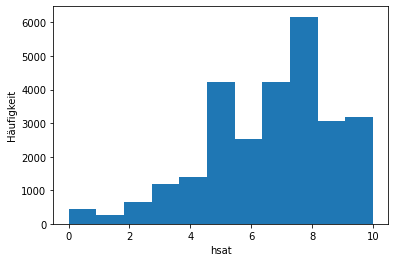

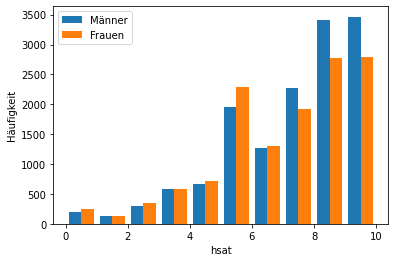

In [ ]:

# Zusaetzliche Bibliothek notwendig
import matplotlib.pyplot as plt

# Histogramm für die Spalte "hsat" erstellen
plt.hist(dfData['hsat'], bins=11)

# Achsenbeschriftungen hinzufügen
plt.xlabel('hsat')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.show()



# Histogramm von hsat in Abhängigkeit vom Geschlecht erstellen
plt.hist([dfData[dfData['female'] == 0]['hsat'], dfData[dfData['female'] == 1]['hsat']], bins=10, label=['Männer', 'Frauen'])
plt.pie
# Achsenbeschriftungen hinzufügen
plt.xlabel('hsat')
plt.ylabel('Häufigkeit')

# Legende hinzufügen
plt.legend()

# Diagramm anzeigen
plt.show()



## Kuchendigramm mit integers

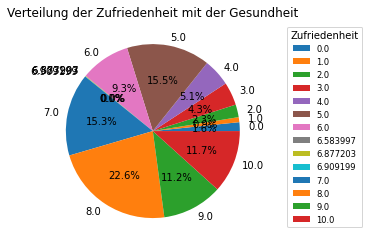

In [ ]:

# Anzahl der Vorkommen jedes Wertes in der Spalte "hsat" ermitteln
hsat_counts = dfData['hsat'].value_counts().sort_index()

# Kuchendiagramm für "hsat" erstellen
plt.pie(hsat_counts.values, labels=hsat_counts.index, autopct='%1.1f%%')

# Titel und Beschriftung hinzufügen
plt.title('Verteilung der Zufriedenheit mit der Gesundheit')
plt.legend(title='Zufriedenheit', bbox_to_anchor=(1.1, 1), loc='upper left',fontsize='small')

# Diagramm anzeigen
plt.show()


## Histogramm mit floats

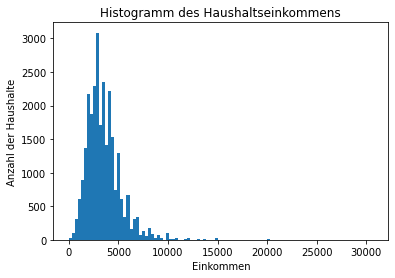

In [ ]:
# Histogramm für "hhninc" erstellen
plt.hist(dfData['hhninc'], bins=100)

# Titel und Beschriftung hinzufügen
plt.title('Histogramm des Haushaltseinkommens')
plt.xlabel('Einkommen')
plt.ylabel('Anzahl der Haushalte')

# Diagramm anzeigen
plt.show()

## Boxplots mit floats

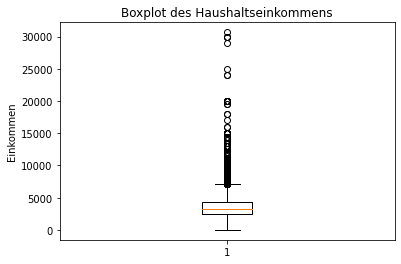

In [ ]:

# Boxplot für "hhninc" erstellen
plt.boxplot(dfData['hhninc'])

# Titel und Beschriftung hinzufügen
plt.title('Boxplot des Haushaltseinkommens')
plt.ylabel('Einkommen')

# Diagramm anzeigen
plt.show()

# Freiwillige Aufgabe

Im [Code](#scrollTo=G8N_dnvrnJcF&line=3&uniqifier=1) nehme ich an, dass die Zufriedenheit zwischen 1 und 10 als integer angegeben wird. Allerdings gibt es im Datensatz 0er Werte sowie Werte, die keine integer sind.

Freiwillige Aufgabe zum Festigen der Programmierung: Schreiben Sie ein Code, mit dem die unqiuen Werte ermittelt und für diese Werte die Anzahl der Nennungen bestimmt.

Tipp: Sie können `unique` sowie `for`-Schleifen nutzen.